**SPAM SMS DETECTION**

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**Import Libraries and Load Data**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
data = pd.read_csv('spam.csv',encoding = 'ISO-8859-1')

**Data Preprocessing**

In [ ]:
data = data[['v1', 'v2']]
data.columns = ['label', 'text']
data['label'] = data['label'].map({'ham': 0, 'spam': 1})
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

<ipython-input-6-13ce52a14b8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].map({'ham': 0, 'spam': 1})


**Text Vectorization (TF-IDF)**

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

**Model Selection and Training**

In [ ]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

**Model Evaluation**

In [ ]:
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



**Interpretation and Further Analysis**

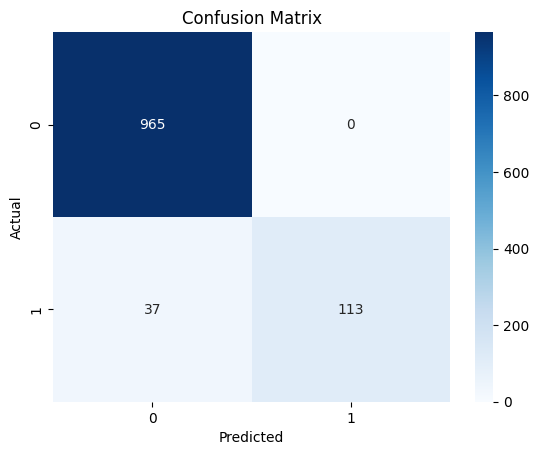

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
misclassified_examples = X_test[y_test != y_pred]
misclassified_actual_labels = y_test[y_test != y_pred]
misclassified_predicted_labels = y_pred[y_test != y_pred]

for i in range(min(5, len(misclassified_examples))):
    print("Predicted:", misclassified_predicted_labels[i])
    print("Actual:", misclassified_actual_labels.iloc[i])
    print("Message:", misclassified_examples.iloc[i])
    print()

Predicted: 0
Actual: 1
Message: We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p

Predicted: 0
Actual: 1
Message: Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 150ppmsg 18+

Predicted: 0
Actual: 1
Message: Loans for any purpose even if you have Bad Credit! Tenants Welcome. Call NoWorriesLoans.com on 08717111821

Predicted: 0
Actual: 1
Message: ringtoneking 84484

Predicted: 0
Actual: 1
Message: U have a secret admirer who is looking 2 make contact with U-find out who they R*reveal who thinks UR so special-call on 09058094594



**Advanced Text Preprocessing**

In [ ]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
data = pd.read_csv('spam.csv',encoding = 'ISO-8859-1')
text_data = data['v2']
nlp = spacy.load("en_core_web_sm")
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    return " ".join(tokens)
preprocessed_text_data = [preprocess_text(text) for text in text_data]
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_text_data)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df.head())

    00  000  000pes  008704050406  0089  0121  01223585236  01223585334  \
0  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
1  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
2  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
3  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
4  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   

   0125698789   02  ...   ìä   ìï   ó_  û_thank  ûªm  ûªt  ûªve   ûï  ûïharry  \
0         0.0  0.0  ...  0.0  0.0  0.0      0.0  0.0  0.0   0.0  0.0      0.0   
1         0.0  0.0  ...  0.0  0.0  0.0      0.0  0.0  0.0   0.0  0.0      0.0   
2         0.0  0.0  ...  0.0  0.0  0.0      0.0  0.0  0.0   0.0  0.0      0.0   
3         0.0  0.0  ...  0.0  0.0  0.0      0.0  0.0  0.0   0.0  0.0      0.0   
4         0.0  0.0  ...  0.0  0.0  0.0      0.0  0.0  0.0   0.0  0.0      0.0   

    ûò  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  

[5 rows

**Ensemble Methods**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [ ]:
text_data = data['v2']
labels = data['v1']
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size=0.2, random_state=42)

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.9757847533632287


In [ ]:
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_ab = adaboost.predict(X_test)
accuracy_ab = accuracy_score(y_test, y_pred_ab)
print("AdaBoost Accuracy:", accuracy_ab)

AdaBoost Accuracy: 0.967713004484305


**Comparison**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
data = pd.read_csv('spam.csv',encoding = 'ISO-8859-1')
text_data = data['v2']
labels = data['v1']
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size=0.2, random_state=42)

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_ab = adaboost.predict(X_test)
accuracy_ab = accuracy_score(y_test, y_pred_ab)

In [ ]:
print("Random Forest Accuracy:", accuracy_rf)
print("AdaBoost Accuracy:", accuracy_ab)

Random Forest Accuracy: 0.9757847533632287
AdaBoost Accuracy: 0.967713004484305


In [ ]:
if accuracy_rf > accuracy_ab:
    print("Random Forest performs better.")
elif accuracy_ab > accuracy_rf:
    print("AdaBoost performs better.")
else:
    print("Both methods have the same accuracy.")

Random Forest performs better.
